# El Método de Bisección para Encontrar Raíces de Ecuaciones

## Introducción

El método de bisección, también conocido como método de corte binario, de partición de intervalos o de Bolzano, es una técnica fundamental en el cálculo numérico para encontrar raíces de ecuaciones. Este método es un ejemplo de método cerrado o de intervalo, que se basa en el teorema del valor intermedio.

### Contexto histórico

El método de bisección tiene sus raíces en el trabajo de matemáticos como Bolzano en el siglo XIX, aunque la idea básica de dividir intervalos para encontrar soluciones es mucho más antigua. Su simplicidad y robustez lo han mantenido como una herramienta importante en la era de la computación.

### Aplicaciones prácticas

El método de bisección se utiliza en diversas áreas de la ingeniería y las ciencias aplicadas, incluyendo:

1. Diseño de sistemas de control
2. Optimización de procesos industriales
3. Análisis de circuitos no lineales
4. Modelado de sistemas físicos
5. Resolución de ecuaciones en química y física

## Fundamentos teóricos

### Teorema del valor intermedio

El método de bisección se basa en el teorema del valor intermedio, que establece:

Si $f(x)$ es una función continua en el intervalo cerrado $[a,b]$, y $f(a)$ y $f(b)$ tienen signos opuestos, entonces existe al menos un valor $c$ en $(a,b)$ tal que $f(c) = 0$.

Matemáticamente:

$$ \text{Si } f(a) \cdot f(b) < 0, \text{ entonces } \exists c \in (a,b) : f(c) = 0 $$

### Algoritmo del método de bisección

1. Elegir un intervalo inicial $[a,b]$ donde $f(a) \cdot f(b) < 0$.
2. Calcular el punto medio $c = \frac{a + b}{2}$.
3. Evaluar $f(c)$.
4. Si $f(c) = 0$ o es suficientemente pequeño, $c$ es la raíz aproximada.
5. Si $f(a) \cdot f(c) < 0$, la raíz está en $[a,c]$. Hacer $b = c$.
6. Si $f(c) \cdot f(b) < 0$, la raíz está en $[c,b]$. Hacer $a = c$.
7. Repetir los pasos 2-6 hasta alcanzar la precisión deseada.


![](./img/diagrama_Biseccion.svg)


### Punto medio 

El punto medio se refiere al valor que divide el intervalo de búsqueda en dos partes iguales. 

En cada iteración del método, se calcula como el promedio aritmético de los extremos del intervalo actual, es decir, $c = \frac{a + b}{2}$, donde $a$ y $b$ son los límites inferior y superior del intervalo respectivamente. 

Este punto medio se utiliza para determinar en qué mitad del intervalo se encuentra la raíz, permitiendo así reducir sistemáticamente el rango de búsqueda en cada paso del algoritmo.

![](./img/biseccion07.webp)


### Estimación del error

El error absoluto en cada iteración está acotado por:

$$ E_a^n = \frac{\Delta x_0}{2^n} $$

donde $\Delta x_0$ es la longitud del intervalo inicial y $n$ es el número de iteraciones.

El número de iteraciones necesarias para alcanzar un error deseado $E_{a,d}$ se puede calcular como:

$$ n = \left\lceil \frac{\log(\Delta x_0 / E_{a,d})}{\log(2)} \right\rceil $$

## Implementación en Python

Aquí se presenta una implementación básica del método de bisección en Python:

In [3]:
import numpy as np

def biseccion(f, a, b, tol=1e-6, max_iter=100):
    """
    Implementa el método de bisección para encontrar una raíz de f en [a,b].
    
    Parámetros:
    f : función de la cual se busca la raíz
    a, b : límites del intervalo inicial
    tol : tolerancia para el criterio de parada
    max_iter : número máximo de iteraciones
    
    Retorna:
    La aproximación de la raíz o None si no se encuentra
    """
    if f(a) * f(b) >= 0:
        print("El método de bisección no es aplicable en este intervalo.")
        return None
    
    c = a
    for i in range(max_iter):
        c_anterior = c
        c = (a + b) / 2
        if f(c) == 0 or (b - a) / 2 < tol: # Se evalua si f(x)=0 o si estamos muy cercano a esta
            return c
        if f(c) * f(a) < 0:  # evaluamos si una parte de la función es (+) y la otra (-)
            b = c
        else:
            a = c
        
        # Calcula y muestra el error relativo aproximado
        if i > 0:
            ea = abs((c - c_anterior) / c) * 100
            print(f"Iteración {i+1}: c = {c:.6f}, Error aprox = {ea:.6f}%")
    
    print("El método alcanzó el número máximo de iteraciones sin converger.")
    return c

# Ejemplo de uso
def f(x):
    return x**3 - x - 2

raiz = biseccion(f, 1, 2)
print(f"La raíz aproximada es: {raiz}")

Iteración 2: c = 1.750000, Error aprox = 14.285714%
Iteración 3: c = 1.625000, Error aprox = 7.692308%
Iteración 4: c = 1.562500, Error aprox = 4.000000%
Iteración 5: c = 1.531250, Error aprox = 2.040816%
Iteración 6: c = 1.515625, Error aprox = 1.030928%
Iteración 7: c = 1.523438, Error aprox = 0.512821%
Iteración 8: c = 1.519531, Error aprox = 0.257069%
Iteración 9: c = 1.521484, Error aprox = 0.128370%
Iteración 10: c = 1.520508, Error aprox = 0.064226%
Iteración 11: c = 1.520996, Error aprox = 0.032103%
Iteración 12: c = 1.521240, Error aprox = 0.016049%
Iteración 13: c = 1.521362, Error aprox = 0.008024%
Iteración 14: c = 1.521423, Error aprox = 0.004012%
Iteración 15: c = 1.521393, Error aprox = 0.002006%
Iteración 16: c = 1.521378, Error aprox = 0.001003%
Iteración 17: c = 1.521385, Error aprox = 0.000501%
Iteración 18: c = 1.521381, Error aprox = 0.000251%
Iteración 19: c = 1.521379, Error aprox = 0.000125%
La raíz aproximada es: 1.5213804244995117


Este código implementa el método de bisección y muestra el error relativo aproximado en cada iteración.

## Ejemplo práctico

Problema: Un ingeniero está diseñando un sistema de amortiguación y necesita encontrar el punto de equilibrio de un resorte no lineal. La fuerza del resorte está dada por la ecuación:

$$ f(x) = 2x^3 - 12x + 10 $$

donde $x$ es el desplazamiento en metros y $f(x)$ es la fuerza en Newtons. Encuentra el punto de equilibrio (raíz) en el intervalo $[0, 2]$ con una tolerancia de $10^{-4}$.

Solución:

### Método gráfico 

Primero aplicaremos el método grafico para tener una idea del número de raices que existen 

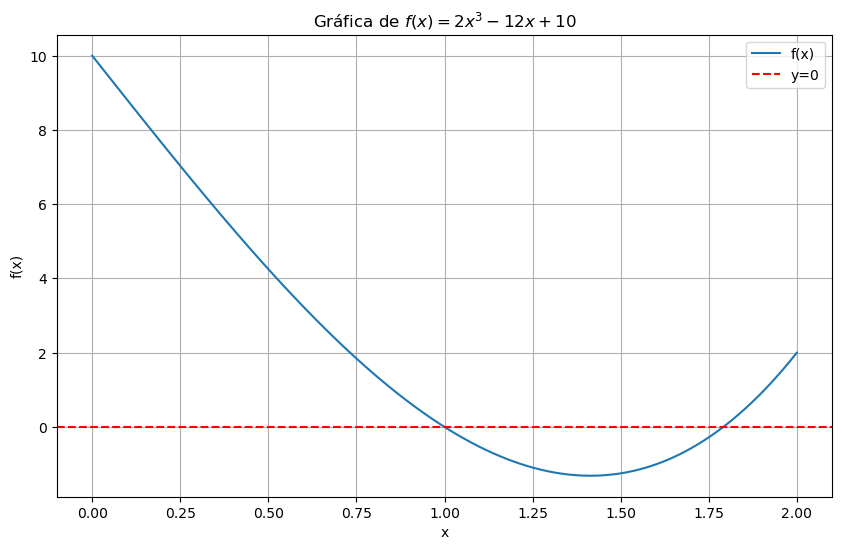

In [22]:
import matplotlib.pyplot as plt 

def fuerza_resorte(x):
    return 2*x**3 - 12*x + 10

x=np.linspace(0,2,100)
y=fuerza_resorte(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x)')
plt.axhline(y=0, color='r', linestyle='--', label='y=0')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de $f(x)=2x^3 - 12x + 10$')
plt.legend()
plt.grid(True)
plt.show()


Vemos que la gráfica nos indica que existeno dos raices entre 0 y 2 por lo que particionaremos la solución en dos intervaloes $[0,1.5]$ y  $[1.5,2]$  

### primera raíz 

In [20]:

raiz = biseccion(fuerza_resorte, 0, 1.5, tol=1e-4)
print(f"El punto de equilibrio del resorte está en x = {raiz:.4f} metros")

Iteración 2: c = 1.125000, Error aprox = 33.333333%
Iteración 3: c = 0.937500, Error aprox = 20.000000%
Iteración 4: c = 1.031250, Error aprox = 9.090909%
Iteración 5: c = 0.984375, Error aprox = 4.761905%
Iteración 6: c = 1.007812, Error aprox = 2.325581%
Iteración 7: c = 0.996094, Error aprox = 1.176471%
Iteración 8: c = 1.001953, Error aprox = 0.584795%
Iteración 9: c = 0.999023, Error aprox = 0.293255%
Iteración 10: c = 1.000488, Error aprox = 0.146413%
Iteración 11: c = 0.999756, Error aprox = 0.073260%
Iteración 12: c = 1.000122, Error aprox = 0.036617%
Iteración 13: c = 0.999939, Error aprox = 0.018312%
El punto de equilibrio del resorte está en x = 1.0000 metros


### segunda raíz 

In [21]:
raiz = biseccion(fuerza_resorte, 1.5,2, tol=1e-4)
print(f"El punto de equilibrio del resorte está en x = {raiz:.4f} metros")

Iteración 2: c = 1.875000, Error aprox = 6.666667%
Iteración 3: c = 1.812500, Error aprox = 3.448276%
Iteración 4: c = 1.781250, Error aprox = 1.754386%
Iteración 5: c = 1.796875, Error aprox = 0.869565%
Iteración 6: c = 1.789062, Error aprox = 0.436681%
Iteración 7: c = 1.792969, Error aprox = 0.217865%
Iteración 8: c = 1.791016, Error aprox = 0.109051%
Iteración 9: c = 1.791992, Error aprox = 0.054496%
Iteración 10: c = 1.791504, Error aprox = 0.027255%
Iteración 11: c = 1.791260, Error aprox = 0.013630%
Iteración 12: c = 1.791382, Error aprox = 0.006814%
El punto de equilibrio del resorte está en x = 1.7913 metros



Este código encontrará el punto de equilibrio del resorte, que es el punto donde la fuerza neta es cero.

## Ejercicios propuestos

1. Implementa una función que calcule el número de iteraciones necesarias para alcanzar una tolerancia dada usando la fórmula del número de iteraciones.

2. Modifica el código del método de bisección para que termine cuando se alcance un error relativo porcentual menor a un valor especificado.

3. Utiliza el método de bisección para encontrar la raíz de la ecuación $e^x = x^2$ en el intervalo $[0, 2]$. Compara el número de iteraciones necesarias con diferentes tolerancias.

## Conclusión

El método de bisección es una técnica robusta y confiable para encontrar raíces de ecuaciones. Sus principales ventajas son:

- Garantía de convergencia si existe una raíz en el intervalo inicial.
- Fácil implementación y comprensión.
- Estimación precisa del error en cada iteración.

Sin embargo, también tiene limitaciones:

- Puede ser más lento que otros métodos más avanzados.
- Requiere que la función cambie de signo en el intervalo inicial.
- No es eficiente para encontrar raíces múltiples o muy cercanas entre sí.

En la práctica de la ingeniería, el método de bisección a menudo se usa como un punto de partida confiable o como respaldo para métodos más rápidos pero menos robustos.

## Referencias

1. Burden, R. L., & Faires, J. D. (2011). Numerical Analysis. Cengage Learning.
2. Chapra, S. C., & Canale, R. P. (2015). Numerical Methods for Engineers. McGraw-Hill Education.
3. Heath, M. T. (2018). Scientific Computing: An Introductory Survey. SIAM.
4. https://estadistica-dma.ulpgc.es/FCC/05-2-Raices-de-Ecuaciones.html
5. https://arturoguillen90.wordpress.com/ecuaciones-no-lineales/biseccion/